In [66]:
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

df = pd.read_parquet('astra21.parquet.snappy')

In [67]:
df.drop(df[df['npoints'].isna()].index, inplace=True)
df['npoints'] = df['npoints'].astype('uint8')
df.drop(df[df['label']=='U'].index, inplace=True)
df['label'] = pd.Categorical(df['label'])
df['label'] = df.label.cat.codes
df.info(verbose=True)

# Y => 2, N => 0, U => 1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23922 entries, 0 to 24678
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         23922 non-null  int8  
 1   npoints       23922 non-null  uint8 
 2   grayscale255  23922 non-null  object
dtypes: int8(1), object(1), uint8(1)
memory usage: 420.5+ KB


In [68]:
df.to_parquet('astra21.im.parquet.snappy', compression='snappy')

df = pd.read_parquet('astra21.im.parquet.snappy')

In [69]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23922 entries, 0 to 24678
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   label         23922 non-null  int8  
 1   npoints       23922 non-null  uint8 
 2   grayscale255  23922 non-null  object
dtypes: int8(1), object(1), uint8(1)
memory usage: 420.5+ KB


In [70]:
df['label'].value_counts()

0    19935
1     3987
Name: label, dtype: int64

In [82]:
df

,label,npoints,grayscale255
0,1,36,"[74.0, 40.0, 71.0, 91.0, 78.0, 53.0, 80.0, 63...."
1,0,131,"[110.0, 72.0, 92.0, 75.0, 111.0, 130.0, 130.0,..."
3,0,101,"[125.0, 83.0, 162.0, 152.0, 129.0, 139.0, 156...."
4,0,33,"[145.0, 114.0, 151.0, 96.0, 91.0, 102.0, 125.0..."
5,0,143,"[142.0, 102.0, 154.0, 117.0, 138.0, 122.0, 186..."
...,...,...,...
24674,0,46,"[149.0, 138.0, 114.0, 167.0, 146.0, 116.0, 118..."
24675,0,26,"[119.0, 129.0, 124.0, 167.0, 76.0, 82.0, 150.0..."
24676,0,59,"[102.0, 135.0, 106.0, 156.0, 162.0, 123.0, 150..."
24677,0,50,"[125.0, 105.0, 185.0, 150.0, 156.0, 118.0, 74...."


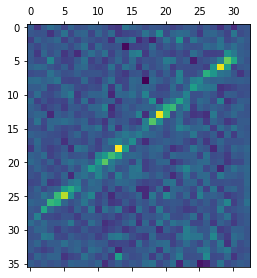

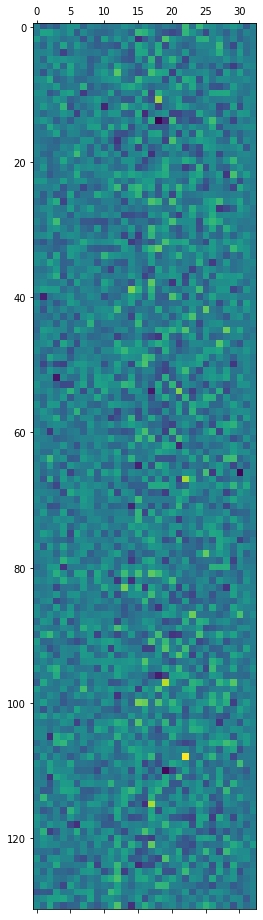

In [86]:
import matplotlib.pyplot as plt

plt.matshow(df['grayscale255'][0].reshape(-1, 33))
plt.matshow(df['grayscale255'][1].reshape(-1, 33))

In [89]:
df['grayscale255'][0].max()

255.0

In [90]:
df['grayscale255'][0].min()

0.0

In [91]:
df['grayscale255'][1].max()

255.0

In [92]:
df['grayscale255'][1].min()

0.0

In [93]:
df['npoints'].min()

24

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])